# Python On Resonance (PyOR)
## Everybody can simulate NMR

Author: Vineeth Thalakottoor 

Email: vineethfrancis.physics@gmail.com

## Tutorial 17: Radiation Damping
Is there anything more mysterious and mischievous than Radiation Damping in NMR? I learned this source of nonlinearity along with distant dipolar field from papers of one of the great NMR spectroscopists **Jean Louis Charles Jeener** (my hero in NMR) who passed away almost one year back. This tutorial is dedicated to him. 

In [79]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import sys
sys.path.append('/media/HD2/Vineeth/PostDoc_Simulations/Github/PyOR_v1.0/Source')

import PythonOnResonance as PyOR

import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib notebook
import sympy as sp
from sympy import *

## Generating Spin System

In [80]:
# Define Spin quantum numbers of individual spins
Slist1 = [1/2]

In [81]:
# Generate Spin Operator
hbarEQ1 = True # If True, hbar = 1
System = PyOR.Numerical_MR(Slist1,hbarEQ1)
Sx,Sy,Sz = System.SpinOperator()
Sp,Sm = System.PMoperators(Sx,Sy)

## Zeeman Halitonian in Rotating Frame

In [82]:
Gamma = [System.gammaH1]
B0 = 9.4 # Tesla, Static Magnetic field (B0) along Z
Offset = [10.0] # Offset frequency in Hz
LarmorF = System.LarmorFrequency(Gamma,B0,Offset)

Larmor Frequency in MHz:  [-400.22802765]


In [83]:
OmegaRF = [-System.gammaH1*B0]
Hz = System.Zeeman_RotFrame(LarmorF,Sz,OmegaRF)

## Initialize Density Matrix

In [84]:
rho_in = np.sum(Sz,axis=0)
rhoeq = np.sum(Sz,axis=0)

## Near 180 deg Pulse

In [85]:
rho = System.Rotate_H(rho_in,179.9,np.sum(Sy,axis=0)) 

## Radiation Damping Constant

In [86]:
RDxi = [20]
RDphase = [0]
Rdamping = True
System.RDparameters(RDxi,RDphase,Rdamping)

## Relaxation Constant

In [87]:
# Define longitudinal and transverse Relaxation
R1 = 1.0 
R2 = 2.0
System.Relaxation_Constants(R1,R2)
#Rprocess = "Random Field Fluxtuation"
Rprocess = "Phenomenological"

## Evolution (Need ODE Solver)

In [88]:
dt = 0.001
AQ = 5.0
Npoints = int(AQ/dt)
method = "ODE Solver"

start_time = time.time()
t, rho_t = System.Evolution_H(rhoeq,rho,Sx,Sy,Sz,Sp,Sm,Hz,dt,Npoints,method,Rprocess)
end_time = time.time()
timetaken = end_time - start_time
print("Total time = %s seconds " % (timetaken))

Total time = 0.40976858139038086 seconds 


## Expectation Value

In [89]:
det = np.sum(Sx,axis=0) + 1j * np.sum(Sy,axis=0)
det1 = np.sum(Sz,axis=0)
t, signal = System.Expectation_H(rho_t,det,dt,Npoints)
t, signal1 = System.Expectation_H(rho_t,det1,dt,Npoints)

## Fourier Spectrum

In [90]:
fs = 1.0/dt
freq, spectrum = System.FourierTransform(signal,fs,5)

## Ploting

<IPython.core.display.Javascript object>


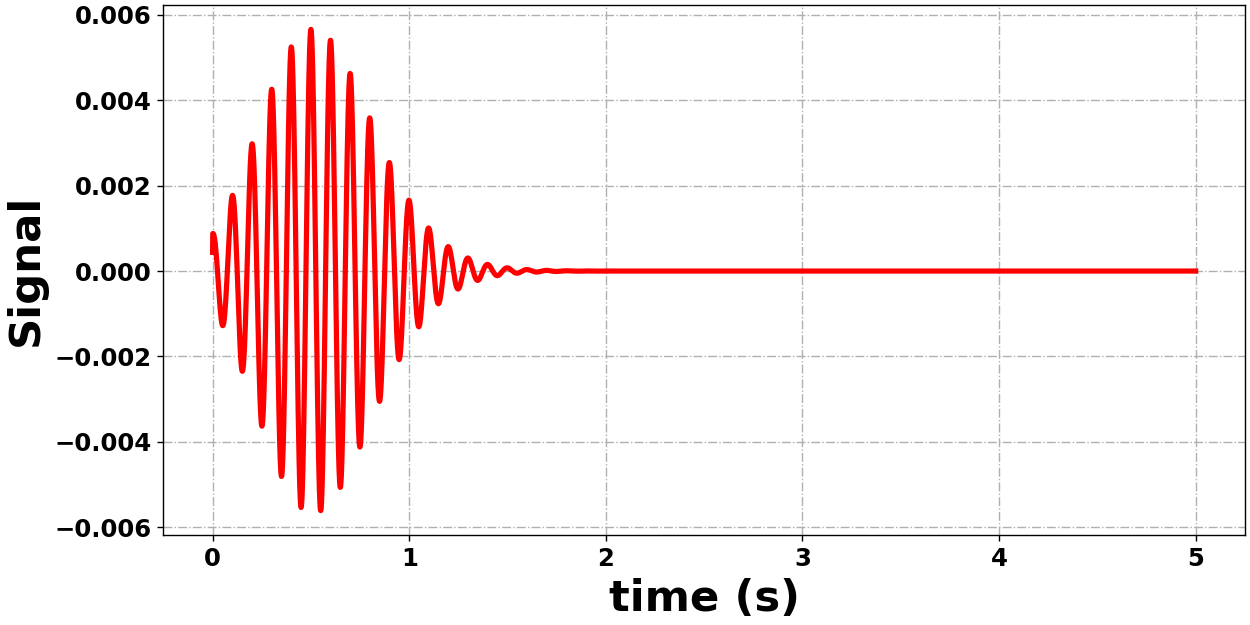

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


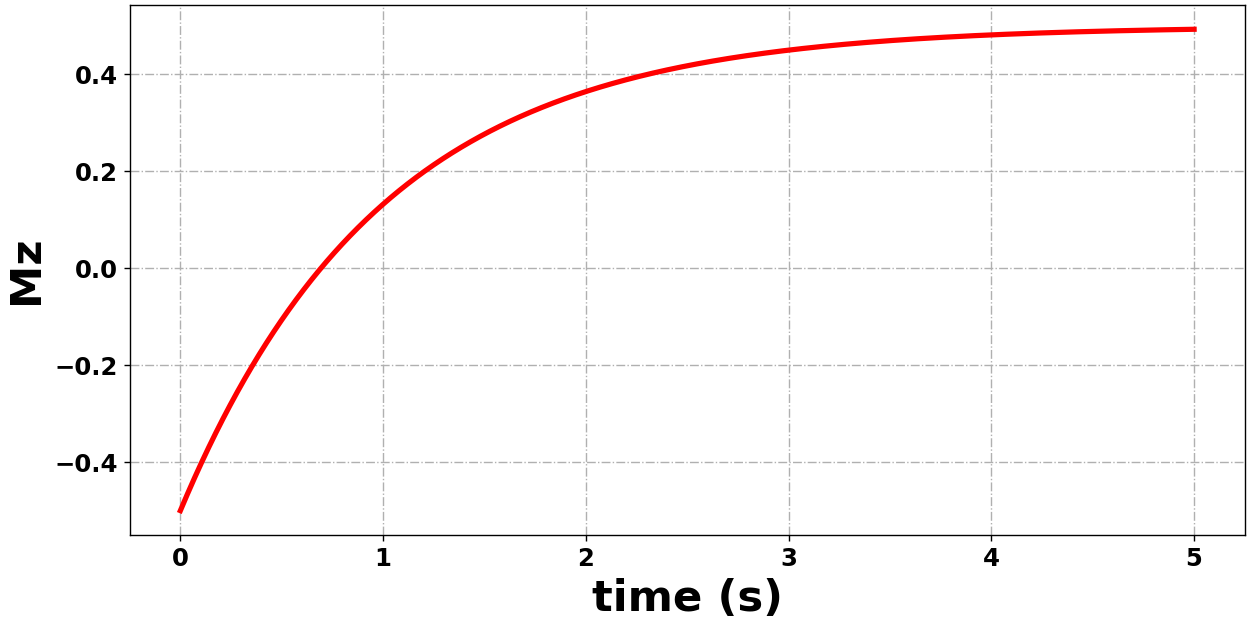

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


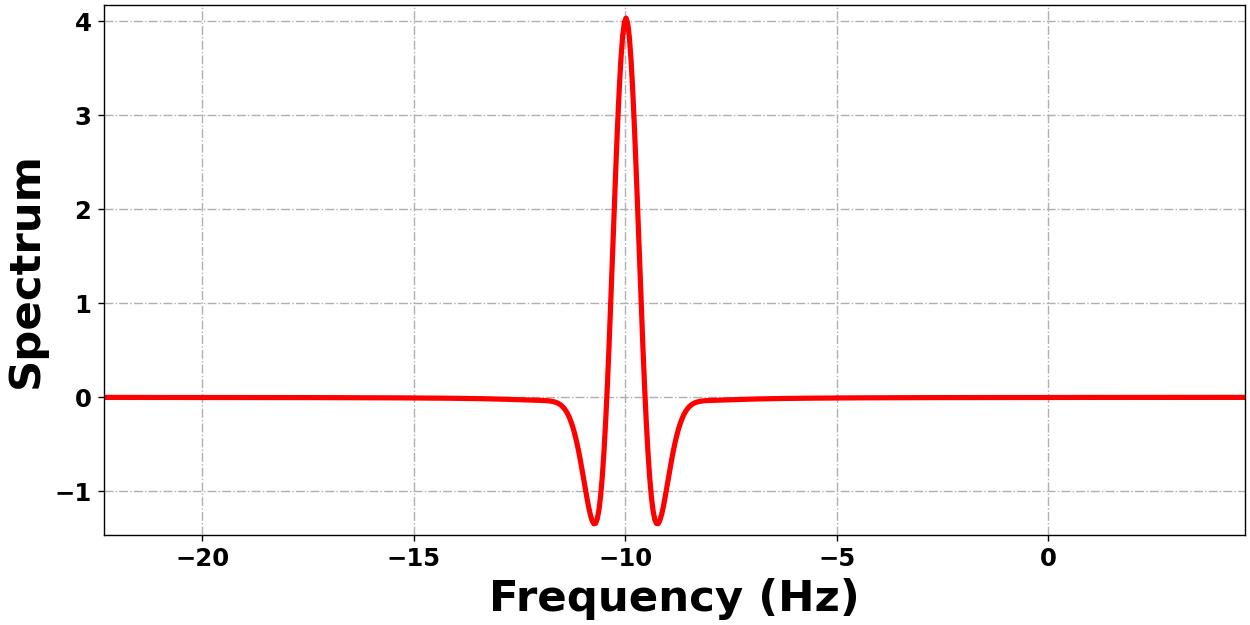

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
No handles with labels found to put in legend.


In [91]:
System.Plotting(4,t,signal,"time (s)","Signal","red")
System.Plotting(5,t,signal1,"time (s)","Mz","red")
System.Plotting(6,freq,(spectrum),"Frequency (Hz)","Spectrum","red")

## Any suggestion? write to me
If you see something is wrong please write to me, so that the PyOR can be error free. 

vineethfrancis.physics@gmail.com